# Math 382

## Homework 6
### Trevor Klar
### April 4, 2017

In [1]:
import matplotlib.pyplot as plt          # this is the
                                         # plot library
    
import numpy as np                       # not strictly necessary
                                         # but useful
    
import scipy.special                     # imported for use with intergration in problem 7
                                         #
import scipy                             #
    
%matplotlib inline                       
                                         # displays plots in the notebook
                                         # instead of popup windows
import math

class point(): 
    def __init__(self, xcoord, ycoord):  #this defines the basic attributes of a point- its coordinates. 
        self.x=xcoord
        self.y=ycoord
    def __repr__(self): #tells how to print() a point
        return str((self.x,self.y))
    def __add__(self, other): #adds corresponding coordinates
        return point(self.x+other.x, self.y+other.y)
    def __sub__(self, other): #subtracts corresponding coordinates
        return point(self.x-other.x, self.y-other.y)
    def __mul__(self, other): #defines scalar multiplication
        return point(float(self.x)*other, float(self.y)*other)
    def __rmul__(self, other): #identical definition as above
        return point(float(self.x)*other, float(self.y)*other)
    def __eq__(self, other): #returns True if coordinates are equal
        if self.x==other.x and self.y==other.y: return True
        else: return False
    def __ne__(self, other): #returns False if coordinates are equal
        return not self==other
    def verticalReflect(self,y): #vertical reflection, returns a point on the opposite side of a horizontal line
        new_y = self.y+2*(y-self.y)
        return point(self.x,new_y)
    def horizontalReflect(self,x): #vertical reflection, returns a point on the opposite side of a horizontal line
        new_x = self.x+2*(x-self.x)
        return point(new_x, self.y)
    def translate(self, x, y): #adds a vector (via the parameters, x and y) to a point's coordinates
        return point(self.x+x, self.y+y)
    def display(self, label="", labeloffset=.05, c="red", fontsize=12): #plots the point
        plt.scatter(self.x, self.y, marker="o", c=c);
        plt.annotate(s=label, xy=(self.x+labeloffset, self.y+labeloffset), fontsize=fontsize);
        plt.axes().set_aspect("equal");
        return plt.axis();

## 1)

#### a) An init method that creates a point with attributes x and y.

In [2]:
P=point(-3,5)
xvalue = P.x; yvalue = P.y
print "xvalue = "+str(xvalue)
print "yvalue = "+str(yvalue)

xvalue = -3
yvalue = 5


#### b) An repr method that returns the ordered pair as a string representing a list of two floats

In [3]:
testpoint = point(3.1,-12.5)
print testpoint

(3.1, -12.5)


#### c) Point addition and subtraction

In [4]:
A=point(1,2); B=point(3,4); C=point(1.2,3.4)
print A+B,A-B

(4, 6) (-2, -2)


#### d) Scalar multiplication from both the right and the left

In [5]:
print 3*A, B*5, (1/2)*C

(3.0, 6.0) (15.0, 20.0) (0.0, 0.0)


#### e) Testing for point equality.

In [6]:
print A == B
print A == A
print A != B

False
True
True


#### f)  Q=P.verticalReflect(y) returns a point Q that is the vertical reflection of P across the horizontal line at y.

In [7]:
P = point(3,-7)
Q = P.verticalReflect(-5)
print Q

(3, -3)


#### g) R=P.horizontalReflect(x) returns a point R that is the horizontal reflection of P across the vertical line at x.

In [8]:
P = point(3,-7)
R = P.horizontalReflect(4)
print R

(5, -7)


#### h) S=P.translate(x,y) that returns a point S that translates the point P a distance x in the x directionand a distance y in the y direction.

In [9]:
P = point(3,-7)
S = P.translate(-1,-1)
print S

(2, -8)


#### i) P.display(options) to display a point in a picture using pyplot.

(0.5, 2)


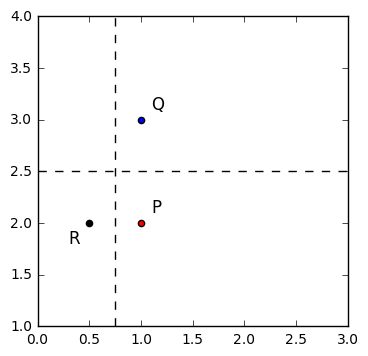

In [10]:
P=point(1,2)
P.display(label="P", labeloffset=0.1)
Q=P.verticalReflect(y=2.5)
Q.display(c="blue", label="Q",labeloffset=0.1)
plt.axhline(y=2.5,c="k",ls="--")
R=P.horizontalReflect(x=0.75)
R.display(c="black",labeloffset=-0.2, label="R")
plt.axvline(x=.75,c="k",ls="--")
plt.xlim(0,3)
plt.ylim(1,4);
print R

## 2)

In [11]:
#this class has methods which are analogous to the methods for the point() class. In fact, many of the definitions
# here use those functions.  
class triangle():
    def __init__(self, vertex_1, vertex_2, vertex_3):
        if not isinstance(vertex_1, point) or not isinstance(vertex_2, point) or not isinstance(vertex_3, point):
            print "Error, verteces must be points"
            return None
        self.v1 = vertex_1; self.v2 = vertex_2; self.v3 = vertex_3
    def __repr__(self):
        return str(self.v1)+", "+str(self.v2)+", "+str(self.v3)
    def translate(self,x,y):
        return triangle(self.v1.translate(x,y), self.v2.translate(x,y), self.v3.translate(x,y))
    def horizontalReflect(self,x):
        return triangle(self.v1.horizontalReflect(x), self.v2.horizontalReflect(x), self.v3.horizontalReflect(x))
    def verticalReflect(self,y):
        return triangle(self.v1.verticalReflect(y), self.v2.verticalReflect(y), self.v3.verticalReflect(y))
    def display(self, vertices="True", label="", labeloffset=-.1, m="o", c="red", fontsize=12, ls="--"):
        if vertices == True:
            #plots the vertices
            x = [self.v1.x, self.v2.x, self.v3.x]
            y = [self.v1.y, self.v2.y, self.v3.y]
            plt.scatter(x, y, marker=m, c=c)
        #plots all 3 edges
        plt.plot([self.v1.x, self.v2.x, self.v3.x, self.v1.x],             
                 [self.v1.y, self.v2.y, self.v3.y, self.v1.y], ls=ls, c=c) 
        if label != "":
            #sets the label location to be the centroid of the triangle
            labelx = np.mean([self.v1.x, self.v2.x, self.v3.x])
            labely = np.mean([self.v1.y, self.v2.y, self.v3.y])
            #annotates the triangle label
            plt.annotate(s=label, xy=(labelx+labeloffset,labely+labeloffset), fontsize=fontsize)
            plt.axes().set_aspect("equal");
        
        

In [12]:
A=point(3,5); B=point(5,3);
C=point(7,4)
T=triangle(A,B,C)
print T
print T.translate(1,1)

(3, 5), (5, 3), (7, 4)
(4, 6), (6, 4), (8, 5)


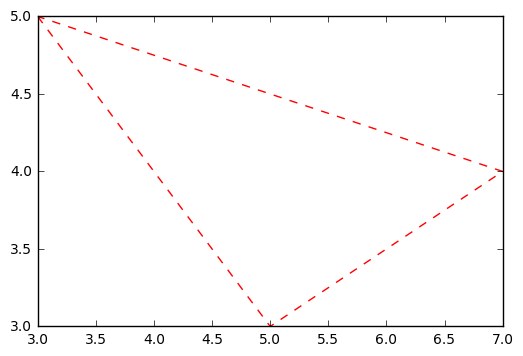

In [13]:
T.display()

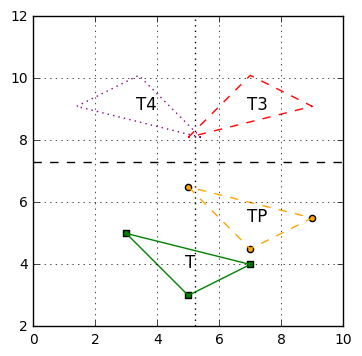

In [14]:
A=point(3,5); B=point(5,3);
C=point(7,4)
T=triangle(A,B,C)
T.display(c="green", vertices=True,m="s", ls="-",label="T")
TP=T.translate(2,1.5)
TP.display(c="orange",vertices=True, label="TP")
T3=TP.verticalReflect(7.3)
T3.display(c="red", ls="--",label="T3")
plt.axhline(y=7.3,ls="--",c="k")
T4=T3.horizontalReflect(5.2)
plt.axvline(x=5.2,c="k",ls=":")
T4.display(c="purple", ls=":",label="T4")
plt.axis([0,10,2,12])
plt.grid()

In [19]:
T_0=triangle(point(-1,0), point(1,0), point(0,np.sqrt(3)/2))

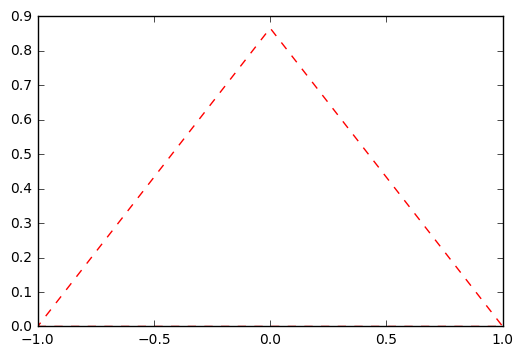

In [20]:
T_0.display()